### CatBoost

* Categoric Boosting ifadesinin kısaltılmışıdır. 

* 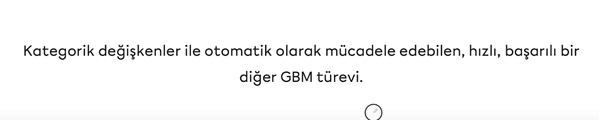 
* Yandex 2017


* Feature Engineering Bölümlerinde gözlemlemiş olmalıyız ki kategorik değişkenler aslında bakılırsa bir miktar baş blası diyelim ki bir kategorik değişkende 15 tane sınıf var. Şimdi bu 15 tane sınıfa ya duyarlı bir algoritma kullanabiliyor olmamız lazım bunlar kategorik değişken bunlara ona göre muamele yap durumunu anlayacak bir algoritma kullanmam lazım ya da bunları one_hot_Encoder'dan geçirmemiz lazım. Ya da bunları eğer sırlaıysa label_Encoder'dan geçirmemiz lazım. Anlaşılacağı üzere kategorik değişkenler bizim için göz önünde bulundurulması gereken önemli başlıklardan birisidir. CatBoost'un da bu noktada kategorik değişken desteği ile bir boosting yöntemi olarak iş gördüğünü söyleyebiliriz.

* Hızlıdır, ölçeklenebilirdir, GPU desteği vardır şeklinde bazı bilgiler var. Vahit hoca hızlı olduğuna henüz şahit olamamış fakat daha başarılı tahminler var iddiasında bir miktar geçerliliği olabileceğini düşünüyor. Bazı senaryolarda bunu gözlemlemiş. Hızlı train ve prediction süresi olduğunu ifade eden bazı makaleler vardır. Bu hızlı train etme işini hatta tahmin işini Vahit hoca pek gözlemleyememiş.

* 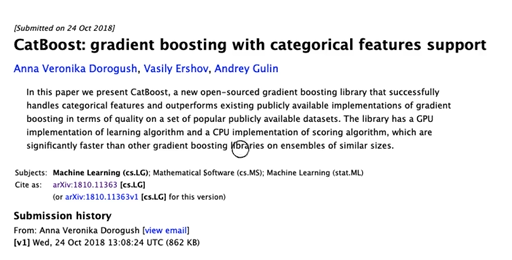

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

warnings.simplefilter(action='ignore', category=Warning)

df = pd.read_csv("datasets/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [2]:
################################################
# CatBoost
################################################

# Model nesnemizi çağırırken verbose=false yapmaya dikkat edelim. Çünkü CatBoost'un çok çirkin bir çıktısı vardır.
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

cv_results = cross_validate(catboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [3]:
cv_results['test_accuracy'].mean()

0.7735251676428148

In [4]:
cv_results['test_f1'].mean()

0.6502723851348231

In [5]:
cv_results['test_roc_auc'].mean()

0.8378923829489867

In [6]:
catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}
# iterations ağaç sayısıdır diyebiliyor olmamız gerekir.

catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)

cv_results = cross_validate(catboost_final, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [7]:
cv_results['test_accuracy'].mean()

0.7721755368814192

In [9]:
cv_results['test_f1'].mean()

0.6322580676028952

In [10]:
cv_results['test_roc_auc'].mean()

0.842001397624039

* DİKKAT : Şu anda gelişmiş ağaç yöntemlerini yöntemler özelinde bitirmiş bulunuyoruz. Bundan sonraki bölümlerde feature importancelara bakacağız ve bazı bonus uygulamalar yapacağız.